# Assignment 3
Halka Hanna


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In this assignment we perform decomposition of three time series datasets.
We apply Box-Cox transformation, visualize original and transformed data, and decompose tha dataset into:
trend, seasonal, and remainder components.

### Helper Plots Functions

Formula for `transformed`: $\left\{\begin{matrix}
Y(\lambda) = \frac{y_1^\lambda - 1 }{\lambda}, for \neq 0\\
Y(\lambda) = ln(y_i), for \lambda = 0\\
\end{matrix}\right.$

In [2]:
def transformed(df, column, list_xticks):
    y = df[column].dropna()
    y = pd.to_numeric(y, errors='coerce')

    # Added bias for negative numbers
    if (y <= 0).any():
        shift = abs(y.min()) + 1e-6
        y = y + shift
    y_box, lam = boxcox(y)

    plt.figure(figsize=(12, 3))
    plt.plot(df.index[:len(y_box)], y_box,
             label=f'Box–Cox λ={lam:.2f}', color='green')
    plt.xticks(list_xticks, rotation=90)
    plt.legend()
    plt.title(f'Transformed {column} (Box–Cox)')
    plt.tight_layout()
    plt.show()


In [3]:
def origin_time_series(x, y, list_xticks):
    plt.figure(figsize=(12, 3))
    plt.plot(x, y, label='Original Time Series', color='yellow')
    plt.xticks(list_xticks, rotation=90)
    plt.legend()

In [4]:
def additive_trend(df, list_xticks, period=365):
    result_add = seasonal_decompose(df, period=period, model='additive')

    plt.figure(figsize=(12, 3))
    plt.plot(result_add.trend.dropna(), label='Additive Trend', color='red')
    plt.xticks(list_xticks, rotation=90)
    plt.legend()
    return result_add

In [5]:
def additive_seasonal(df, list_xticks, period=365):
    result_add = seasonal_decompose(df, period=period, model='additive')

    plt.figure(figsize=(12, 3))
    plt.plot(result_add.seasonal.dropna(), label='Additive Seasonal', color='purple')
    plt.xticks(list_xticks, rotation=90)
    plt.legend()

## Daily Temperature

In [6]:
df_tempt = pd.read_csv('../data/daily_tempt.csv')

In [7]:
df = df_tempt.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

list_xticks = ['1981-01-01', '1981-06-01', '1982-01-01', '1982-06-01',
            '1983-01-01', '1983-06-01', '1984-01-01', '1984-06-01',
            '1985-01-01', '1985-06-01', '1986-01-01', '1986-06-01',
            '1987-01-01', '1987-06-01', '1988-01-01', '1988-06-01',
            '1989-01-01', '1989-06-01', '1990-01-01', '1990-06-01']

In [8]:
result = adfuller(df_tempt['mean-tempt'])
print(f'p-value = {result[1]:.5f}')

p-value = 0.00025


### Plots

Transformed mean temperature.

Box-Cox transformation stabilizes variance. Fluctuations appear more uniform, so decomposition into
trend and seasonal is more reliable.

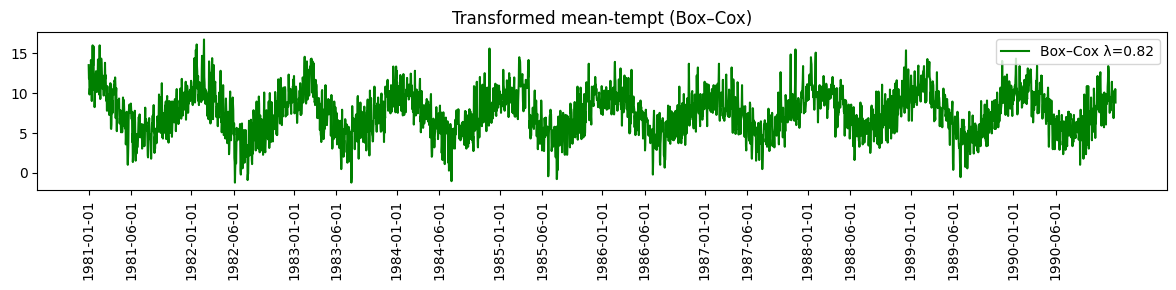

In [9]:
transformed(df, 'mean-tempt', list_xticks)

Again simple plot for mean temperature per day.

We see repeating patterns, we can identify seasonal component and possible long term change.

i.e. decomposition is appropriate.

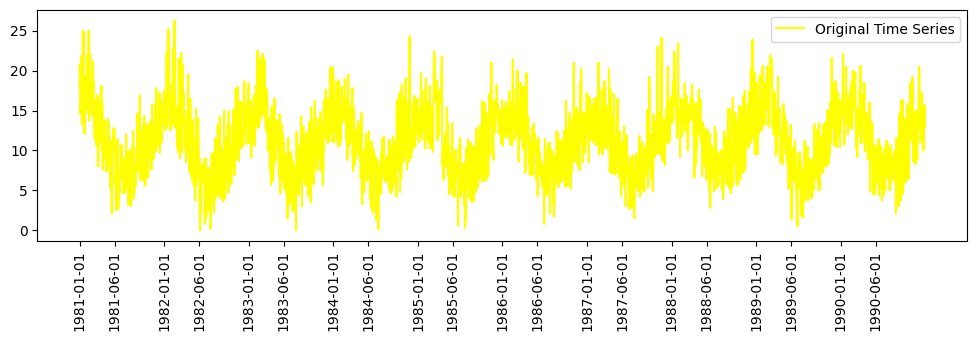

In [10]:
origin_time_series(df_tempt['Date'], df_tempt['mean-tempt'], list_xticks)

As we can see we don't have trend here. This is because this dataset is cyclical. Every winter and
 summer we can see the same picture.

In [11]:
df

,mean-tempt
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


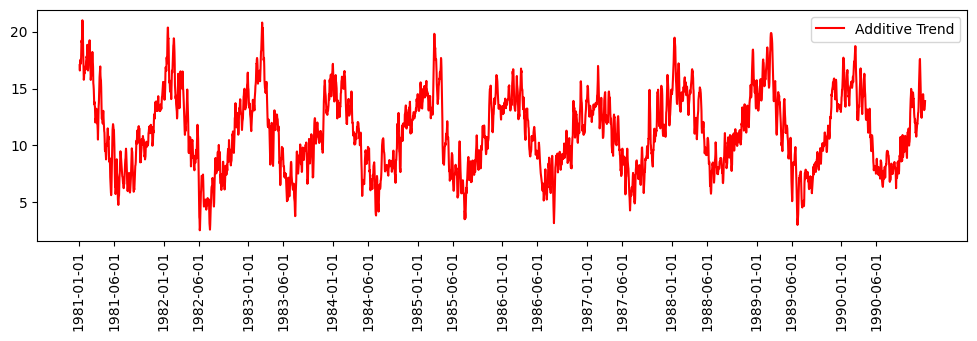

In [12]:
adt_tempt = additive_trend(df, list_xticks, 7) # -> p
# adt_tempt2 =  additive_trend(adt_tempt, list_xticks, 90) # використати mstl 7, 90, 365
# additive_trend(adt_tempt, list_xticks, 365)

Seasonality is very well traced.

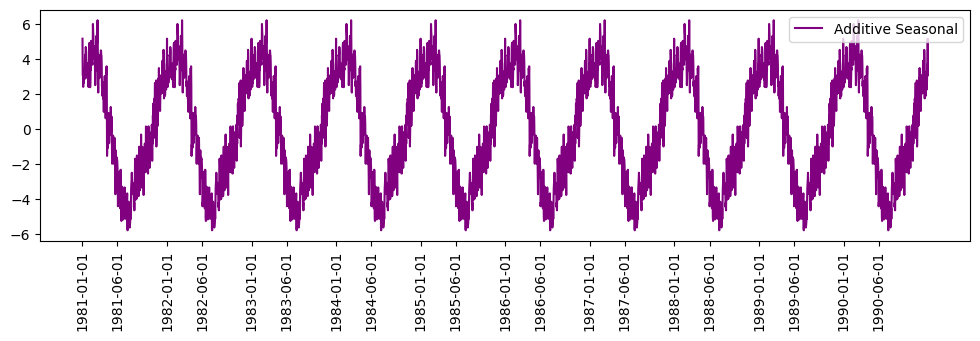

In [13]:
additive_seasonal(df, list_xticks)

## Weekly CO2

In [14]:
df_co2 = pd.read_csv('../data/weekly_co2.csv')

In [15]:
df = df_co2.copy()
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df['average'] = pd.to_numeric(df['average'], errors='coerce')
df = df.set_index('Date').sort_index()

list_xticks = ['1974-05-19', '1976-01-11',
                '1977-09-04', '1979-04-29',
                '1980-12-21', '1982-08-15',
                '1984-04-08', '1985-12-01',
                '1987-08-16', '1989-04-09',
                '1990-12-02', '1992-07-26',
                '1994-03-20', '1995-11-12',
                '1997-07-06', '1999-02-28',
                '2000-10-22', '2002-06-16',
                '2004-02-08', '2005-10-02',
                '2007-05-27', '2009-01-18',
                '2010-09-12', '2012-05-06',
                '2014-01-05', '2015-08-30',
                '2017-04-23', '2018-12-16',
                '2020-08-09', '2022-04-03',
                '2023-11-26', '2025-07-20']

p-value is high, so our series is non-stationary, i.e. mean/variance changes over time.

In [16]:
result = adfuller(df_co2['average'])
print(f'p-value = {result[1]:.5f}')

p-value = 0.98798


### Plots

Our plot shows clear upward trend Co2 consistently increases over time. Seasonal oscillations
remain visible.

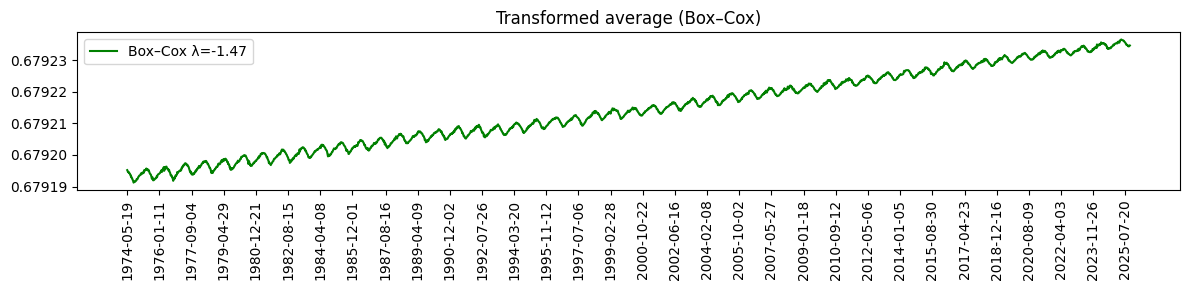

In [17]:
transformed(df, 'average', list_xticks)

On original plot we observ more small noise.

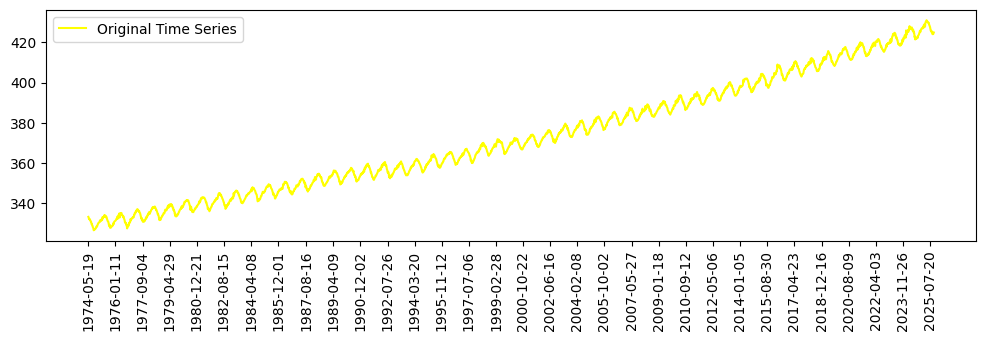

In [18]:
origin_time_series(df_co2['Date'], df_co2['average'], list_xticks)

Upward trend.

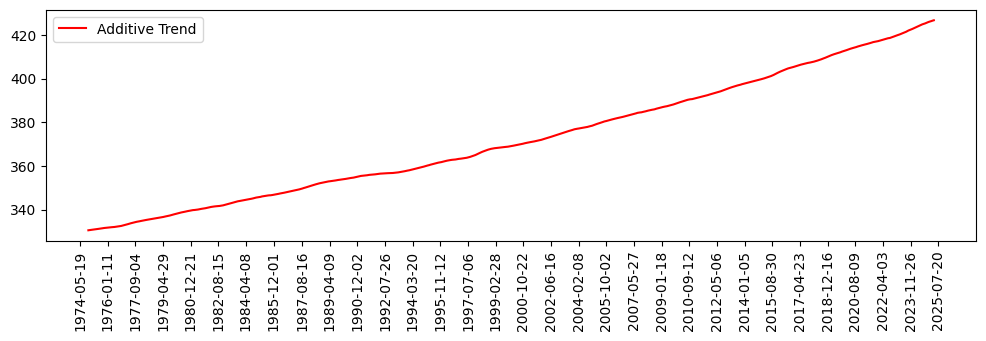

In [19]:
additive_trend(df['average'], list_xticks, period=52)

We observe very regular repeating annual cycle. This reflects natural carbon annual cycle.

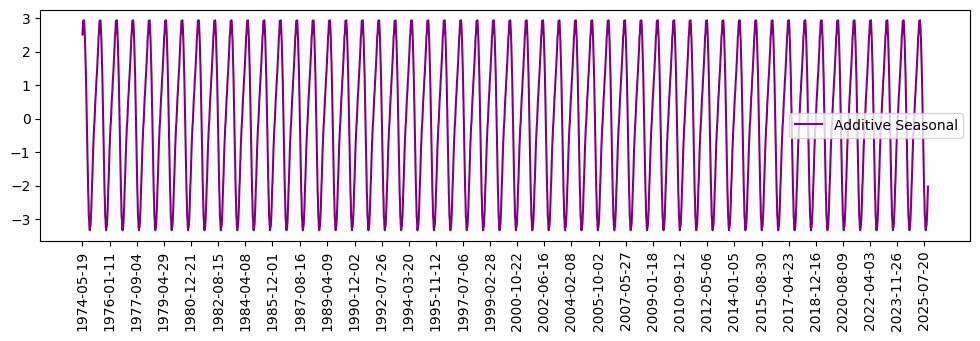

In [20]:
additive_seasonal(df['average'], list_xticks, period=52)

## Hourly AEP

In [21]:
df_aep = pd.read_csv('../data/hourly_aep.csv')

In [22]:
df = df_aep.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

list_xticks = ['2005-01-01 00:00:00', '2005-06-01 00:00:00',
               '2006-01-01 00:00:00', '2006-06-01 00:00:00',
               '2007-01-01 00:00:00', '2007-06-01 00:00:00',
               '2008-01-01 00:00:00', '2008-06-01 00:00:00',
               '2009-01-01 00:00:00', '2009-06-01 00:00:00',
               '2010-01-01 00:00:00', '2010-06-01 00:00:00',
               '2011-01-01 00:00:00', '2011-06-01 00:00:00',
               '2012-01-01 00:00:00', '2012-06-01 00:00:00',
               '2013-01-01 00:00:00', '2013-06-01 00:00:00',
               '2014-01-01 00:00:00', '2014-06-01 00:00:00',
               '2015-01-01 00:00:00', '2015-06-01 00:00:00',
               '2016-01-01 00:00:00', '2016-06-01 00:00:00',
               '2017-01-01 00:00:00', '2017-06-01 00:00:00',
               '2018-01-01 00:00:00', '2018-06-01 00:00:00',]

p-value is 0 so we can reject the null hypotheses of non-stationarity. It means that short-term fluctuation in
 electricity consumption are stable over time, without strong long-term trend.

In [23]:
result = adfuller(df_aep['AEP_MW'])
print(f'p-value = {result[1]:.5f}')

p-value = 0.00000


### Plots

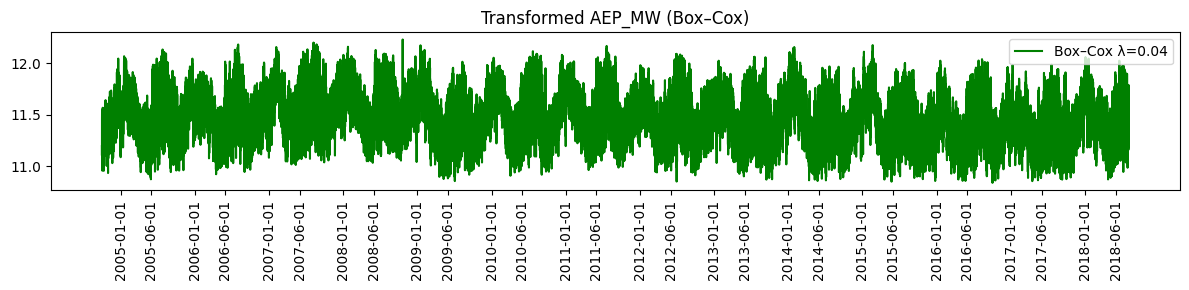

In [24]:
transformed(df, 'AEP_MW', list_xticks)

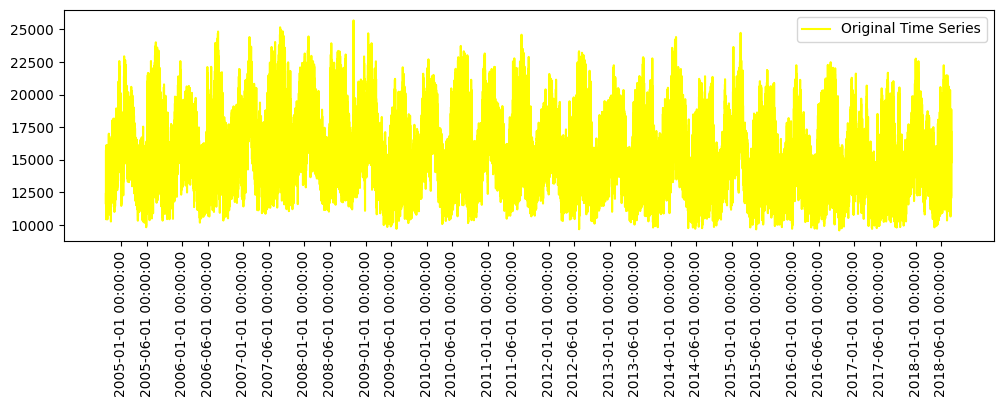

In [25]:
origin_time_series(df_aep['Date'], df_aep['AEP_MW'], list_xticks)

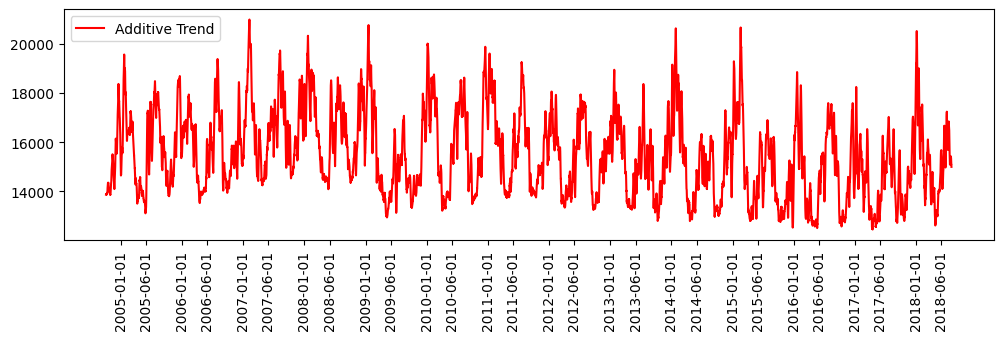

In [26]:
additive_trend(df, list_xticks, 168) # 24, 24*7,

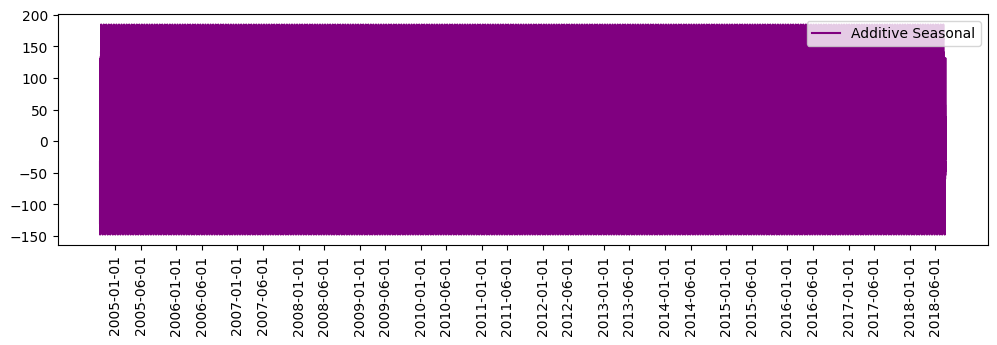

In [27]:
additive_seasonal(df, list_xticks)

### Final Conclusion

Across all datasets Box-Cox transformation was useful for variance stabilization.

Decomposition highlights that temperature and Co2 have clear seasonal behavior while AEP shows
more complex seasonality.